In [ ]:
# The following source is used for defining and training the model. The project demonstration is near the bottom with the model split and the use of Flask  
# https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [3]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [4]:
dataiter = iter(trainloader)
images, labels = next(dataiter)


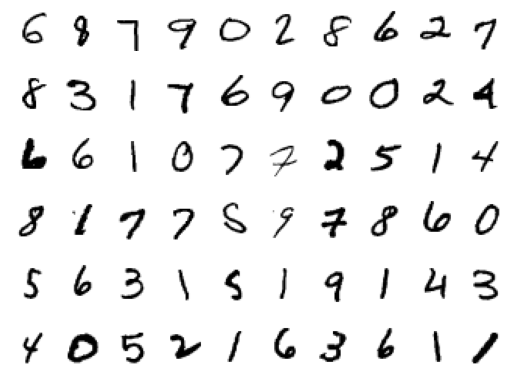

In [5]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [6]:
#define the model's parameters
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

'''
#Test this later
model = nn.Sequential(nn.Conv1d(in_channels=12, out_channels=32, kernel_size=5, stride=1, padding=2),
                      nn.Conv1d(in_channels=12, out_channels=32, kernel_size=5, stride=1, padding=2),
                      nn.MaxPool1d(kernel_size=2),
                      nn.Conv1d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2),
                      nn.Conv1d(in_channels=64, out_channels=64, kernel_size=5, stride=1, padding=2),
                      nn.Conv1d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2),
                      nn.Conv1d(in_channels=128, out_channels=128, kernel_size=5, stride=1, padding=2),
                      nn.Conv1d(in_channels=128, out_channels=256, kernel_size=5, stride=1, padding=2),
                      nn.Conv1d(in_channels=256, out_channels=256, kernel_size=5, stride=1, padding=2),
                      nn.Dropout(p=0.2),
                      nn.Linear(256 * 8, 512),
                      nn.Linear(512, 256),
                      nn.Linear(256, 128),
                      nn.Linear(128, 64),
                      nn.Linear(64, 32),
                      nn.Linear(32, num_classes))
'''

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


'\n#Test this later\nmodel = nn.Sequential(nn.Conv1d(in_channels=12, out_channels=32, kernel_size=5, stride=1, padding=2),\n                      nn.Conv1d(in_channels=12, out_channels=32, kernel_size=5, stride=1, padding=2),\n                      nn.MaxPool1d(kernel_size=2),\n                      nn.Conv1d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2),\n                      nn.Conv1d(in_channels=64, out_channels=64, kernel_size=5, stride=1, padding=2),\n                      nn.Conv1d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2),\n                      nn.Conv1d(in_channels=128, out_channels=128, kernel_size=5, stride=1, padding=2),\n                      nn.Conv1d(in_channels=128, out_channels=256, kernel_size=5, stride=1, padding=2),\n                      nn.Conv1d(in_channels=256, out_channels=256, kernel_size=5, stride=1, padding=2),\n                      nn.Dropout(p=0.2),\n                      nn.Linear(256 * 8, 512),\n      

In [7]:
#Criterion is the target function we are maximizing/minimizing
#Optimizer is the algorithm we are using to minimize/maximize the criterion

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [8]:
#Train the model

optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    #trainloader has a batch size of 64. Each loop will go through 64 images
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Erase accumulated gradients
        optimizer.zero_grad()
        
        #forward pass with a tensor of images
        output = model(images)
        
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
        print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6343638929667503

Training Time (in minutes) = 0.062338348229726157
Epoch 1 - Training loss: 0.28922839140269296

Training Time (in minutes) = 0.12375174760818482
Epoch 2 - Training loss: 0.22418945644900742

Training Time (in minutes) = 0.18654653231302898
Epoch 3 - Training loss: 0.1792725858641967

Training Time (in minutes) = 0.2482906142870585
Epoch 4 - Training loss: 0.14718098680117428

Training Time (in minutes) = 0.31635634899139403
Epoch 5 - Training loss: 0.1259410311755881

Training Time (in minutes) = 0.37484313249588014
Epoch 6 - Training loss: 0.11089475995112362

Training Time (in minutes) = 0.434165366490682
Epoch 7 - Training loss: 0.09668461896224952

Training Time (in minutes) = 0.49457153081893923
Epoch 8 - Training loss: 0.08811272004210173

Training Time (in minutes) = 0.5525754491488138
Epoch 9 - Training loss: 0.08017274510732957

Training Time (in minutes) = 0.6140264471371969
Epoch 10 - Training loss: 0.07302192303993459

Training T

In [9]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [10]:
#calculate accuracy of the model

correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.976


In [11]:
#THIS IS A TEST ITS NOT NEEDED
#print the weights of the model
for name, module in model.named_children():
    if isinstance(module, nn.Linear):
        print(name)
        print(module.weight.data)

0
tensor([[-0.0156,  0.0452, -0.0039,  ..., -0.0100,  0.0346,  0.0047],
        [-0.0128,  0.0288, -0.0063,  ...,  0.0008,  0.0111, -0.0329],
        [-0.0156, -0.0102,  0.0096,  ..., -0.0022,  0.0068,  0.0057],
        ...,
        [ 0.0160, -0.0057,  0.0024,  ...,  0.0111, -0.0097, -0.0335],
        [ 0.0329,  0.0107,  0.0062,  ...,  0.0185, -0.0018, -0.0369],
        [-0.0033, -0.0188,  0.0196,  ...,  0.0225,  0.0231, -0.0251]])
2
tensor([[ 1.8777e-01,  2.3403e-02, -1.0093e-01,  ..., -3.0504e-02,
          7.9274e-02, -5.9264e-02],
        [ 1.7783e-01,  8.3140e-02, -7.2185e-02,  ...,  8.8724e-03,
          1.1676e-01, -1.6619e-02],
        [-6.3294e-02,  1.2542e-01,  1.2392e-01,  ..., -5.7948e-02,
          8.9966e-02,  6.5934e-05],
        ...,
        [ 2.0741e-02, -5.6090e-02, -9.2034e-02,  ..., -5.3224e-02,
          6.9048e-02,  8.4454e-02],
        [-2.5223e-01,  4.2340e-02,  3.2963e-02,  ...,  9.9630e-04,
          1.2276e-01, -4.4560e-02],
        [ 7.0151e-02,  3.4880e-02,

In [12]:
dataiter = iter(valloader)
images, labels = next(dataiter)

In [13]:
#split the model
frontend_model = nn.Sequential(*list(model.children())[:2])
backend_model = nn.Sequential(*list(model.children())[2:])             

In [18]:
import socket
host_name = socket.gethostname()
local_ip = socket.gethostbyname(host_name)
local_ip

'192.168.1.130'

running on 192.168.1.130:10000
Inference from backend:  6
Below is the original image input from the frontend


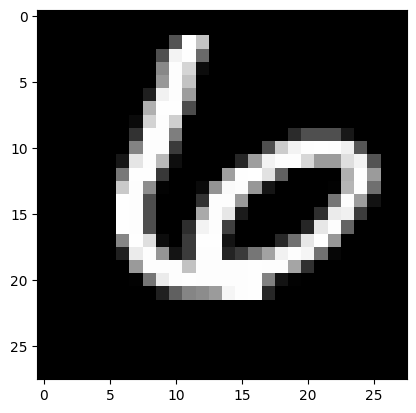

In [51]:
#Flask Client
import requests
import torch
import pickle
import socket
import random

port_num = "10000"

host_name = socket.gethostname()
local_ip = socket.gethostbyname(host_name)


#get a random image from the test set (valset)
images, labels = next(iter(valloader))
random_image = images[random.randint(0, len(images))]


#serialize the model and data
serialized_model = pickle.dumps(backend_model)
serialized_data = pickle.dumps(frontend_model(random_image.view(1,-1)))

#send the model and data to the server
response = requests.post(f'http://{local_ip}:{port_num}/inference', 
                         files={'model': serialized_model, 'data': serialized_data})

#Deserialize the results
results = pickle.loads(response.content)

print(f'running on {local_ip}:{port_num}')
print("Inference from backend: ", torch.argmax(results, dim=1).item())

#This is the original image input
print("Below is the original image input from the frontend")
plt.imshow(random_image.view(28,28), cmap='gray')

In [ ]:
'''
#This attempts to use AWS Lambda to split the model
import boto3
import json
import io
import base64
import requests

boto3.setup_default_session(profile_name='admin')
lambda_client = boto3.client('lambda', region_name='us-east-2')

buffer = io.BytesIO()
torch.save(backend_model.state_dict(), buffer)
model_bytes = buffer.getvalue()
model_base64 = base64.b64encode(model_bytes).decode('utf-8')

payload = {
    'input' : frontend_model(images[0].view(1,-1)).tolist(),
    'model' : model_base64
}

response = lambda_client.invoke(
    FunctionName='splitML',
    InvocationType='RequestResponse',
    Payload=json.dumps(payload)
)
print(response['Payload'].read())

#response = requests.post('http://localhost:9000/predict', json=payload)
print(response.json())
'''

b'{"errorMessage": "Unable to import module \'lambda_function\': No module named \'torch\'", "errorType": "Runtime.ImportModuleError", "requestId": "1dfcb3f8-96c6-4e5f-9941-aca318c9768f", "stackTrace": []}'


AttributeError: 'dict' object has no attribute 'json'